<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/CNN/notebooks/09_08_%E8%87%89%E9%83%A8%E5%81%B5%E6%B8%AC_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 使用Face-Recognition套件進行臉部偵測

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -fs /content/gdrive/My\ Drive /app
%cd /app/DL_Book/src

Mounted at /content/gdrive
/content/gdrive/My Drive/DL_Book/src


## 載入相關套件

In [2]:
!pip install dlib
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 21 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=b47950c9a814a9f3462e2f46b0c5d56a34e866c478dd088495e8f43173cf9193
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [3]:
# 安裝套件： pip install face-recognition
# 載入相關套件
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import face_recognition

## 載入並顯示圖檔

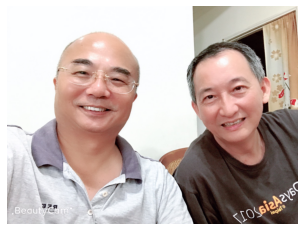

In [4]:
# 載入圖檔
image_file = "../images_face/classmates.jpg"
image = plt.imread(image_file)

# 顯示圖像
plt.imshow(image)
plt.axis('off')
plt.show()

## 呼叫 face_locations 函數偵測臉部

In [5]:
# 偵測臉部
faces = face_recognition.face_locations(image)

## 臉部加框，顯示圖像

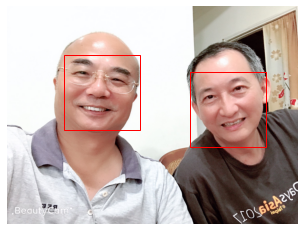

In [6]:
# 臉部加框
ax = plt.gca()
for result in faces:
    # 取得框的座標
    y1, x1, y2, x2 = result
    width, height = x2 - x1, y2 - y1
    # 加紅色框
    rect = Rectangle((x1, y1), width, height, fill=False, color='red')
    ax.add_patch(rect)
        
# 顯示圖像
plt.imshow(image)
plt.axis('off')
plt.show()

## 偵測臉部特徵點並顯示

chin 特徵點: [(957, 484), (968, 523), (981, 561), (1000, 598), (1023, 629), (1055, 657), (1094, 677), (1137, 693), (1180, 689), (1221, 670), (1250, 639), (1274, 605), (1292, 566), (1298, 522), (1297, 476), (1291, 430), (1282, 384)]

left_eyebrow 特徵點: [(970, 459), (980, 433), (1003, 418), (1032, 413), (1060, 414)]

right_eyebrow 特徵點: [(1120, 395), (1143, 373), (1172, 361), (1202, 363), (1226, 378)]

nose_bridge 特徵點: [(1098, 441), (1107, 477), (1115, 512), (1124, 548)]

nose_tip 特徵點: [(1093, 558), (1112, 562), (1133, 565), (1151, 552), (1168, 539)]

left_eye 特徵點: [(1007, 473), (1020, 458), (1038, 454), (1058, 461), (1042, 467), (1024, 471)]

right_eye 特徵點: [(1148, 436), (1161, 417), (1180, 409), (1201, 414), (1186, 423), (1167, 430)]

top_lip 特徵點: [(1081, 606), (1100, 594), (1121, 586), (1142, 585), (1160, 576), (1186, 569), (1215, 567), (1208, 571), (1164, 585), (1146, 593), (1125, 595), (1090, 605)]

bottom_lip 特徵點: [(1215, 567), (1198, 598), (1177, 618), (1157, 627), (1135, 630), (1110, 

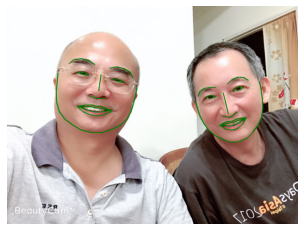

In [7]:
# 偵測臉部特徵點並顯示
from PIL import Image, ImageDraw

# 載入圖檔
image = face_recognition.load_image_file(image_file)

# 轉為 Pillow 圖像格式
pil_image = Image.fromarray(image)

# 取得圖像繪圖物件
d = ImageDraw.Draw(pil_image)

# 偵測臉部特徵點
face_landmarks_list = face_recognition.face_landmarks(image)

for face_landmarks in face_landmarks_list:
    # 顯示五官特徵點
    for facial_feature in face_landmarks.keys():
        print(f"{facial_feature} 特徵點: {face_landmarks[facial_feature]}\n")

    # 繪製特徵點
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5, fill='green')
    
# 顯示圖像
plt.imshow(pil_image)
plt.axis('off')
plt.show()